In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import time
import math
%matplotlib

In [3]:
#loading data
orangepaths = glob.glob('../data/linear_classification/train/oranges/*jpeg')
applepaths = glob.glob('../data/linear_classification/train/apples/*jpeg')
testfile = '../data/linear_classification/test/orange6.jpeg'

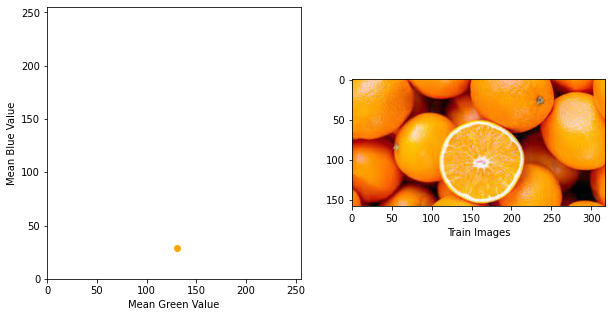

225.86402832166448 130.08921719868675 28.637791226612872
243.4702264856904 197.43378577399196 108.804223221749
196.54943502824858 113.74984085302778 43.394226943582396
190.33277694982613 82.57023348236463 6.549528067560854
179.45435105435106 131.46134046134046 55.425245025245026
171.63816296296295 166.3121975308642
191.04920634920634 176.81962301587302
209.2793810951993 192.45486324905158
62.043234126984125 49.903373015873015
145.32867160493828 150.20246913580246


In [7]:
#Plotting configuration
cnt = 0
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_ylabel('Mean Blue Value')
ax.set_xlabel('Mean Green Value')
ax2 = f.add_subplot(122)
ax2.set_aspect('equal')

orange_vals = []
# Go through each image and plot G,B values (oranges)
for i in orangepaths:
    img = plt.imread(i)
    rmean = np.mean(img[:,:,0])
    gmean = np.mean(img[:,:,1])
    bmean = np.mean(img[:,:,2])
    ax.scatter(gmean,bmean, marker='o', c='orange') 
    ax2.imshow(img)
    ax2.set_xlabel('Train Images')
    plt.show()
    f.savefig(str(cnt)+'.jpg')
    cnt+=1
    plt.pause(1)
    orange_vals.append((gmean, bmean))
    print(rmean, gmean, bmean)
apple_vals = []

# Go through each image and plot G,B values (apples)
for i in applepaths:
    img = plt.imread(i)
    rmean = np.mean(img[:,:,0])
    gmean = np.mean(img[:,:,1])
    bmean = np.mean(img[:,:,2])
    ax.scatter(gmean,bmean, marker='o', c='red')
    ax2.imshow(img)
    plt.show()
    f.savefig(str(cnt)+'.jpg')
    cnt+=1
    plt.pause(1)
    apple_vals.append((gmean, bmean))
    print(gmean, bmean)

# candidate m and c values
m = np.linspace(0.1,math.pi*2,10)
m = [math.tan(i) for i in m]
c = np.linspace(-255,255,10)
loss = {}

# loop through m and c values
for cc in c:
    for mm in m:
        # plot the line
        x = np.linspace(0,255,20)
        y = [mm*i+cc for i in x]
        ax.plot(x,y,alpha = 0.1, c='g')
        ax.set_xlim(0, 255)
        ax.set_ylim(0, 255)
        plt.pause(0.0001)
        curr_loss = 0

        # calculate loss for mm and cc
        for (x,y) in orange_vals:
            curr_loss += np.sign(y-mm*x-cc)
        for (x,y) in apple_vals:
            curr_loss -= np.sign(y-mm*x-cc)
        loss[curr_loss] = (mm,cc)

# Find the lowest loss
lowest_loss = min(list(loss.keys()))
lowest_m, lowest_c = loss[lowest_loss]
x = np.linspace(0,255,20)
y = [lowest_m*i+lowest_c for i in x]
ax.plot(x,y, c='b')                       
        
plt.pause(3)

# Inference
img = plt.imread(testfile)
rmean = np.mean(img[:,:,0])
gmean = np.mean(img[:,:,1])
bmean = np.mean(img[:,:,2])
Ax2 is my .imshow(img)
ax2.set_xlabel('Test Image')
plt.pause(1)
ax.scatter(gmean,bmean, marker='x', c='b')
plt.pause(1)

if np.sign(bmean- lowest_m*gmean-lowest_c)==1:
    plt.text(110,-10,'Apple',size='xx-large', c='r')
else:    
    plt.text(110,-10,'Orange',size='xx-large',c='r')



